In [1]:
import time as time
import datetime as datetime
import pandas as pd
import yfinance as yf
import matplotlib as plt
from backtesting import Strategy
from backtesting.lib import crossover

In [26]:
#Data set & columns
df = pd.read_csv('out.csv', header=None)
#columns = ['symbol' 'timestamp' 'tzinfo' 'open' 'high' 'low' 'close' 'volume' 'trade count' 'vwap']
df.rename(columns={0: 'symbol', 1: 'timestamp', 2: 'open', 3: 'high', 4: 'low', 5: 'close', 6: 'volume', 7: 'trade count', 8: 'vwap'}, inplace=True)
df


,symbol,timestamp,open,high,low,close,volume,trade count,vwap
0,BTC/USD,2023-05-22 12:32:00+00:00,26817.90,26832.96,26817.51,26830.72,1.04268,64.0,26822.704753
1,BTC/USD,2023-05-22 12:33:00+00:00,26832.65,26841.49,26830.57,26839.83,0.96305,90.0,26837.569853
2,BTC/USD,2023-05-22 12:34:00+00:00,26839.84,26851.95,26838.08,26844.67,0.77784,80.0,26848.146267
3,BTC/USD,2023-05-22 12:35:00+00:00,26847.34,26849.84,26832.39,26841.27,1.19810,94.0,26839.796077
4,BTC/USD,2023-05-22 12:36:00+00:00,26838.96,26841.72,26837.99,26841.01,0.25819,34.0,26839.565391
5,BTC/USD,2023-05-22 12:37:00+00:00,26841.00,26841.00,26823.79,26823.79,0.37998,50.0,26832.612045
6,BTC/USD,2023-05-22 12:38:00+00:00,26823.53,26827.44,26813.65,26814.65,0.51513,38.0,26819.580816
7,BTC/USD,2023-05-22 12:39:00+00:00,26815.95,26823.15,26812.42,26817.75,0.71932,68.0,26817.117678
8,BTC/USD,2023-05-22 12:41:00+00:00,26825.75,26831.90,26825.73,26828.13,0.14353,34.0,26829.333824
9,BTC/USD,2023-05-22 12:42:00+00:00,26826.72,26843.19,26826.72,26837.78,0.59465,99.0,26836.456531


STOCHASTIC OSCILLATOR

In [27]:
 #OSCILLATOR FORMULA

#14 day low average 
L14 = df['low'].rolling(14).min()
H14 = df['high'].rolling(14).max()
    
#formula variables 
C = df['close']
K = ((C - L14) * 100 / (H14 - L14))

Dvalue = K.rolling(3).mean()   

In [29]:
#BUY AND SELL SIGNAL
#finding values less than 20 and more than 80
osell = Dvalue.loc[Dvalue>80]
obuy = Dvalue.loc[Dvalue<20]


<AxesSubplot: >

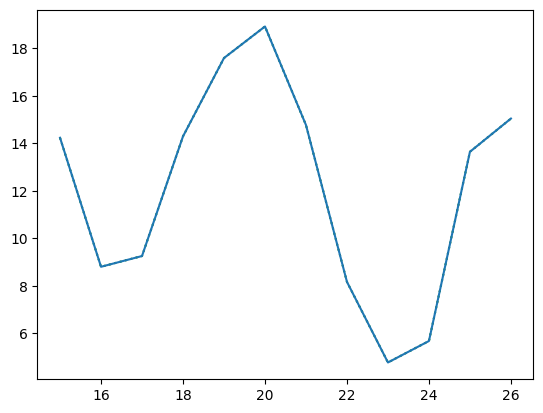

In [30]:
#Sell Signal
osell.plot(color='red', linestyle='dotted')

#Buy Signal
obuy.plot(color='green', linestyle='dotted')
Dvalue.plot()
##df['close'].plot()


MACD

In [18]:
#Calculates divergence of stock price momentum 

exp1 = df['Close'].ewm(span=12).mean()
exp2 = df['Close'].ewm(span=26).mean() 
macd = exp1 - exp2
signal = macd.ewm(span=9).mean()
signal

2020-12-01     0.000000
2020-12-02    -0.066227
2020-12-03     0.002707
2020-12-04     0.092639
2020-12-07     0.338612
                ...    
2022-12-23   -13.664886
2022-12-27   -14.746507
2022-12-28   -15.797212
2022-12-29   -16.592110
2022-12-30   -17.125488
Name: Close, Length: 525, dtype: float64

In [19]:
#need to find a way to select values where MACD is separated from the
#the signal by a difference of +-3

msell = macd.loc[macd>signal]
mbuy = macd.loc[macd<signal]
msell

2020-12-03    0.101972
2020-12-04    0.268187
2020-12-07    0.919503
2020-12-08    1.409487
2020-12-09    1.013875
                ...   
2022-12-06   -7.821881
2022-12-07   -8.228116
2022-12-08   -8.500485
2022-12-09   -8.169487
2022-12-12   -8.712899
Name: Close, Length: 282, dtype: float64

<AxesSubplot: >

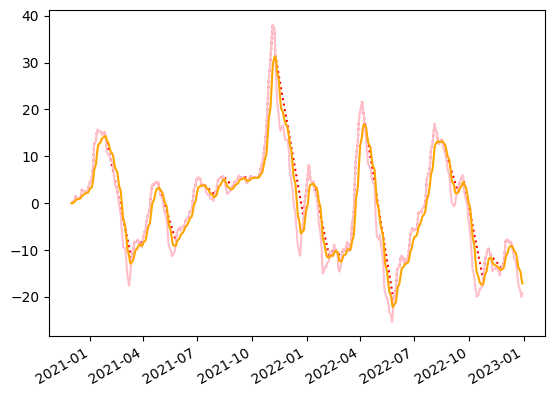

In [17]:
#Plotting Variables
msell.plot(color='red', linestyle='dotted')
#mbuy.plot(color='green', linestyle='dotted')
macd.plot(color='pink')
signal.plot(color='orange')
#df['close'].plot(secondary_y=True)


Bollinger Bands

In [14]:
#BB formula and variables
ma_30 = df['Close'].rolling(window=30).mean()
std_20 = df['Close'].rolling(window=20).std() 
upper = (ma_30 + 2*std_20)
lower = (ma_30 - 2*std_20)


In [15]:
#selecting dates and values where the price is greater than the upper
#and less than the lower
bsell = df['Close'].loc[df['Close']>upper]
bbuy = df['Close'].loc[df['Close']<lower]


<AxesSubplot: >

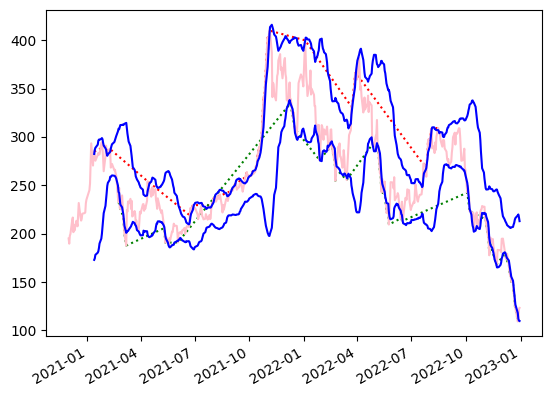

In [16]:
#Plotting buy and sell signals
bsell.plot(color='red', linestyle='dotted')
bbuy.plot(color='green', linestyle='dotted')
df['Close'].plot(color='pink')

#Graph
upper.plot(color='blue')
lower.plot(color='blue')
